In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 22.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd

df = pd.read_csv('/content/daily-total-female-births-CA.csv')  # Try tab separator
print(df.head())  # Display first few rows to check structure


         date  births
0  1959-01-01      35
1  1959-01-02      32
2  1959-01-03      30
3  1959-01-04      31
4  1959-01-05      44


            births
date              
1959-01-01      35
1959-01-02      32
1959-01-03      30
1959-01-04      31
1959-01-05      44


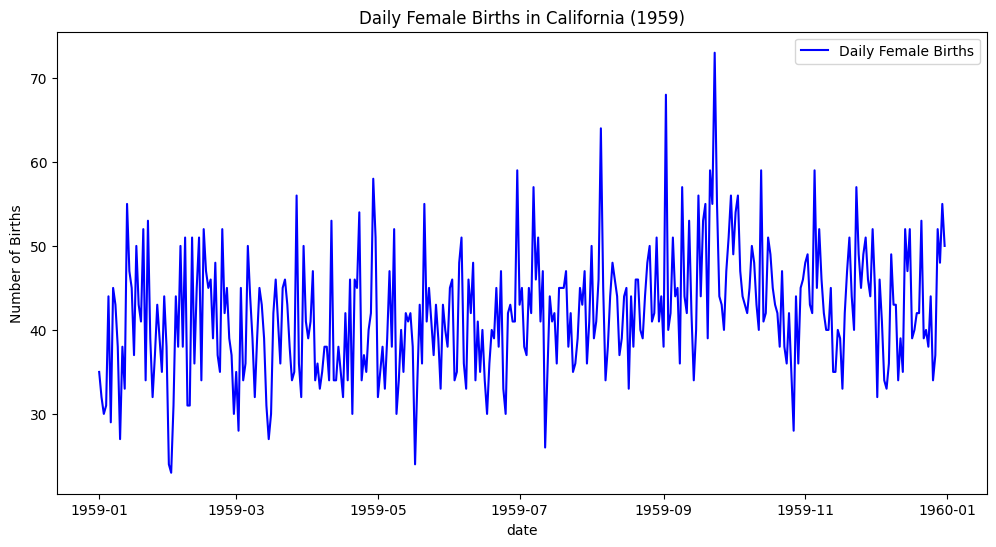

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/daily-total-female-births-CA.csv", parse_dates=["date"], index_col="date")

# Display first few rows
print(df.head())

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df["births"], label="Daily Female Births", color="blue")
plt.xlabel("date")
plt.ylabel("Number of Births")
plt.title("Daily Female Births in California (1959)")
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF Test
adf_test = adfuller(df["births"])
print(f"ADF Statistic: {adf_test[0]}")
print(f"P-Value: {adf_test[1]}")

if adf_test[1] < 0.05:
    print(" Data is Stationary")
else:
    print(" Data is Non-Stationary, Differencing Required")

ADF Statistic: -4.808291253559765
P-Value: 5.2434129901498554e-05
 Data is Stationary


In [ ]:
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(train["births"], order=(2,1,2))  # (p=2, d=1, q=2)
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

                               SARIMAX Results                                
Dep. Variable:                 births   No. Observations:                  292
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -985.074
Date:                Tue, 15 Apr 2025   AIC                           1980.149
Time:                        03:34:55   BIC                           1998.515
Sample:                    01-01-1959   HQIC                          1987.506
                         - 10-19-1959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6368     61.620     -0.010      0.992    -121.410     120.136
ar.L2          0.0525      4.490      0.012      0.991      -8.748       8.853
ma.L1         -0.2461     61.625     -0.004      0.9

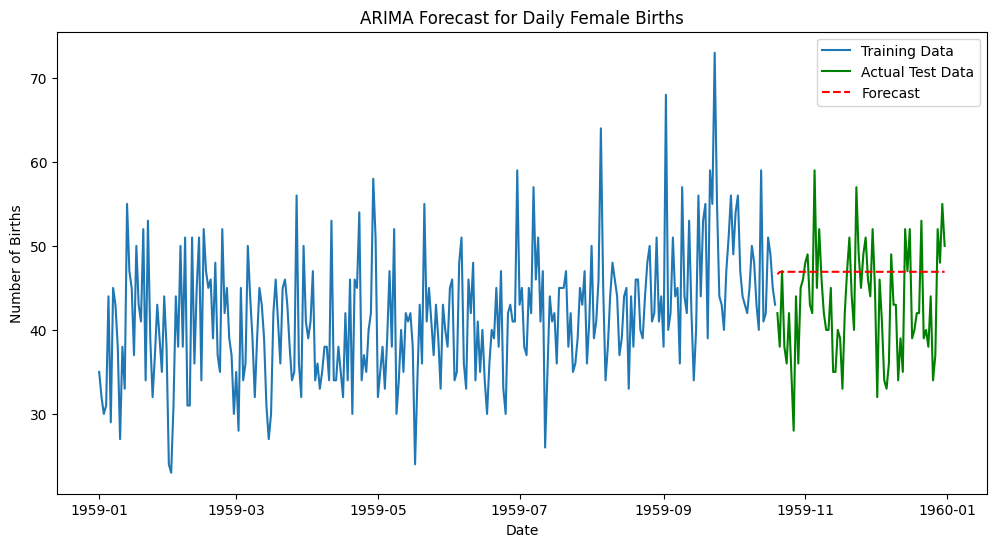

In [ ]:
# Forecast for the test period
forecast = model_fit.forecast(steps=len(test))

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(train.index, train["births"], label="Training Data")
plt.plot(test.index, test["births"], label="Actual Test Data", color="green")
plt.plot(test.index, forecast, label="Forecast", linestyle="--", color="red")
plt.xlabel("Date")
plt.ylabel("Number of Births")
plt.title("ARIMA Forecast for Daily Female Births")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Compute errors
mae = mean_absolute_error(test["births"], forecast)
mse = mean_squared_error(test["births"], forecast)
rmse = mse ** 0.5
mape = (abs(test["births"] - forecast) / test["births"]).mean() * 100

# Print evaluation results
print(f" Mean Absolute Error (MAE): {mae:.2f}")
print(f" Mean Squared Error (MSE): {mse:.2f}")
print(f" Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f" Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

 Mean Absolute Error (MAE): 6.18
 Mean Squared Error (MSE): 56.37
 Root Mean Squared Error (RMSE): 7.51
 Mean Absolute Percentage Error (MAPE): 15.87%
